<a href="https://colab.research.google.com/github/hyun3282/web1/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount("/content/drive/")
myfilename1 = "/content/drive/MyDrive/titanic/train.csv"
myfilename2 = "/content/drive/MyDrive/titanic/test.csv"

Mounted at /content/drive/


In [ ]:
train_df=pd.read_csv(myfilename1)
test_df=pd.read_csv(myfilename2)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train_df.isnull().sum())#각 feature들에 대해 비어있는 값들 개수의 총합.
train_df.dtypes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Familysize       0
AgeGroup         0
FareGroup        0
Sexnum           0
EmbarkedNum      0
AgeBand          0
dtype: int64


PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Familysize        int64
AgeGroup       category
FareGroup      category
Sexnum            int64
EmbarkedNum       int64
AgeBand        category
dtype: object

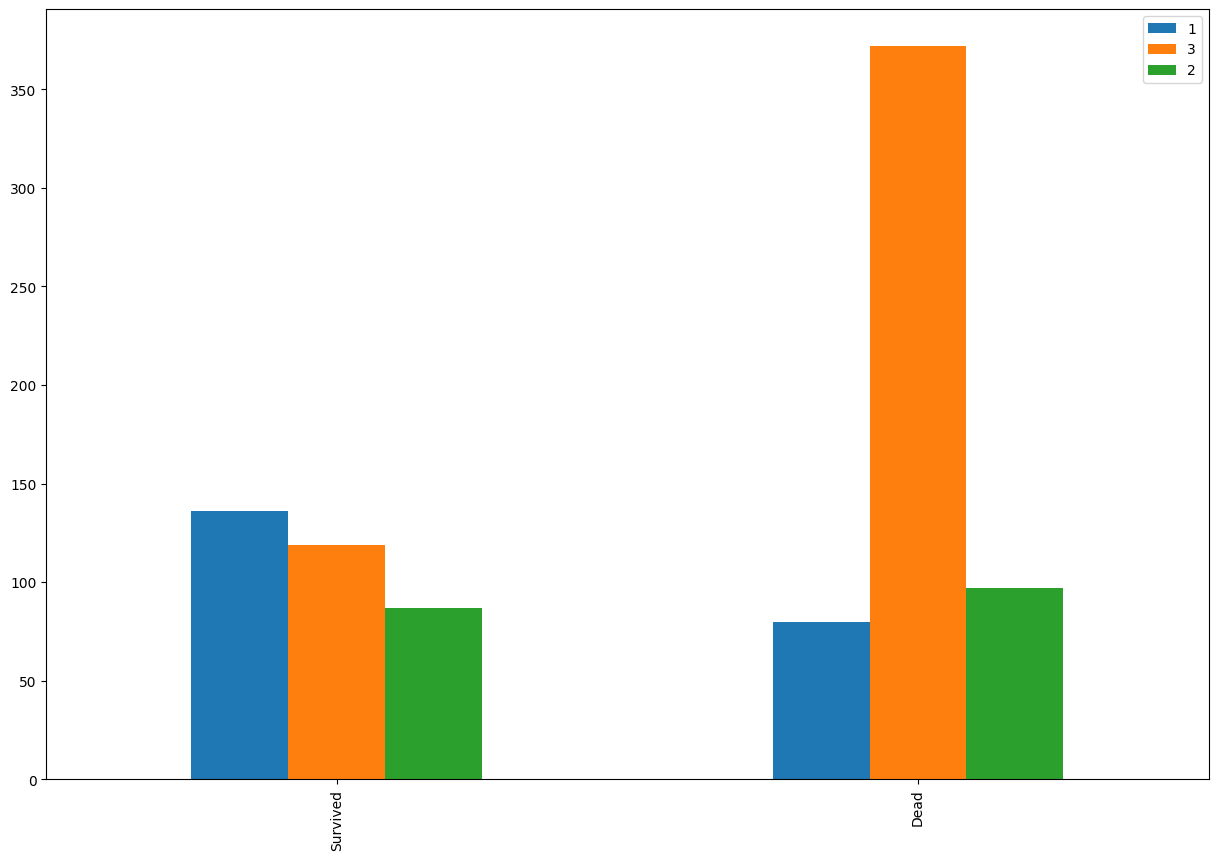

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def bar_chart(feature):
  Survived=train_df.loc[train_df["Survived"]==1,feature].value_counts()  # survived=1일 때 각 feature 값의 개수
  Dead=train_df.loc[train_df["Survived"]==0,feature].value_counts() #survived=0일 때 각 feature 값의 개수
  data=pd.DataFrame([Survived,Dead],index=["Survived","Dead"]) #데이터 프레임으로 전환
  data.plot(kind="bar",figsize=(15,10)) #그래프 종류
  plt.show() # 그래프 시각적으로 표현
#pclass에 따른 생존/사망자 확인
bar_chart("Pclass")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


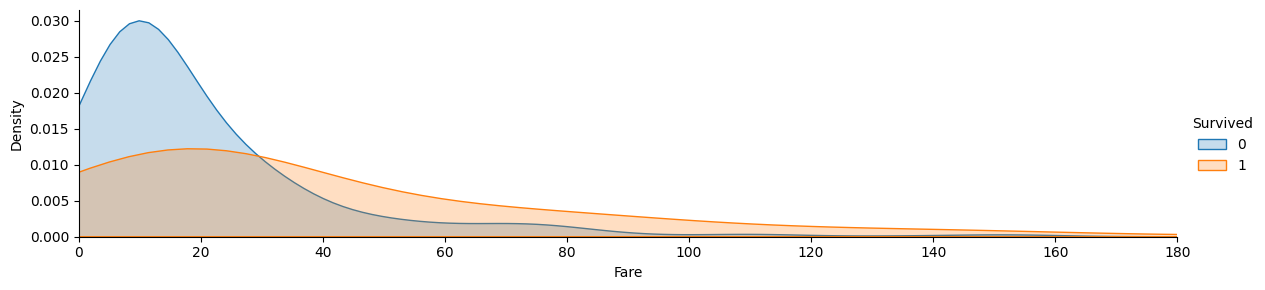

In [ ]:
#fare 에 따른 생존/사망자 확인
def kedplot(feature):
  facet = sns.FacetGrid(train_df,hue='Survived',aspect=4) #FacetGrid는 여러개의 그래프를 한 번에 표현 가능, 괄호 첫 번째는 이용할 데이터, 두번째는 구분 기준이 되는 feature, aspect는 그래프 크기 표현
  facet.map(sns.kdeplot,feature,shade=True) #kdeplot은 밀도추정 함수
  facet.set(xlim=(0,train_df[feature].max()))# facet의 x범위 설정(0이상 'fare'max값 이하)
  facet.add_legend() # facet에 범례 추가해서 각 그래프들 구분을 용이하게
  plt.xlim(0,180) #plt x 범위를 0부터 180 사이로
  plt.show()
kedplot("Fare")

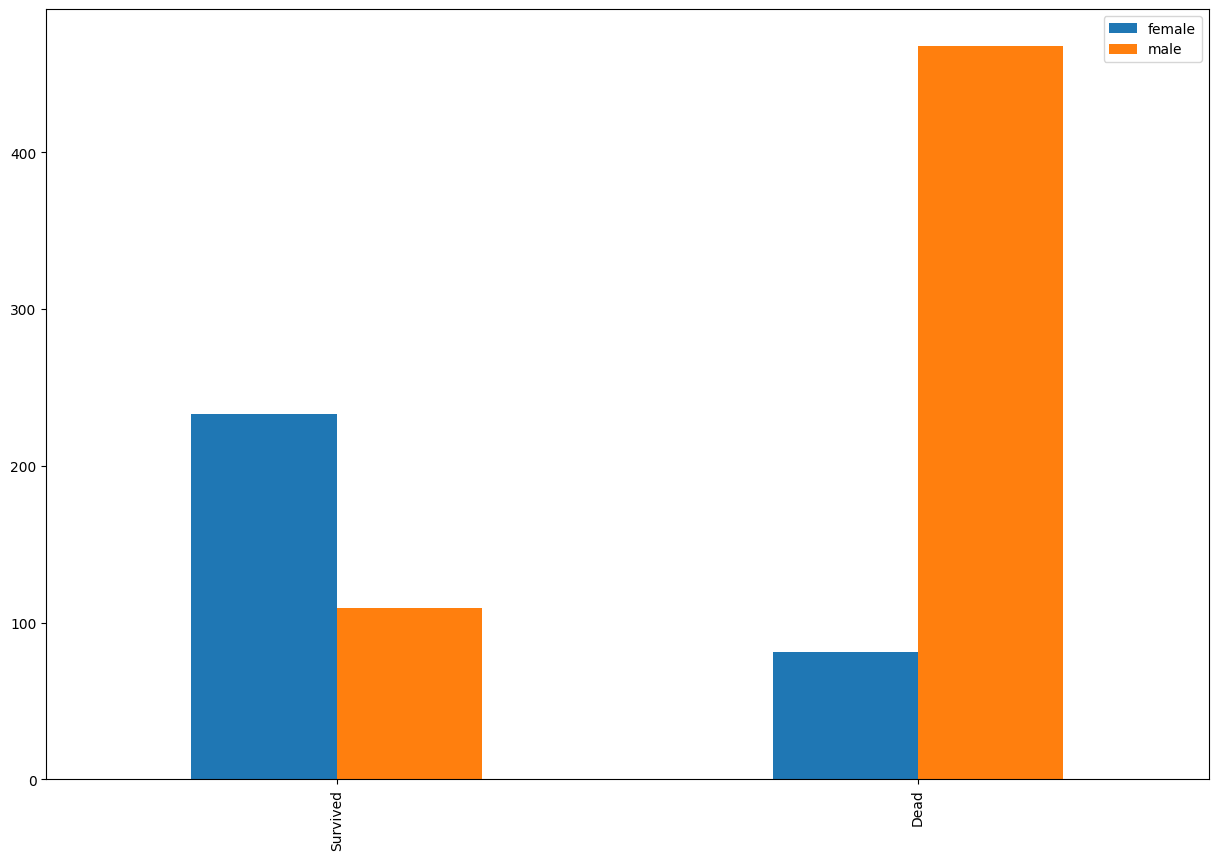

In [ ]:
bar_chart("Sex")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


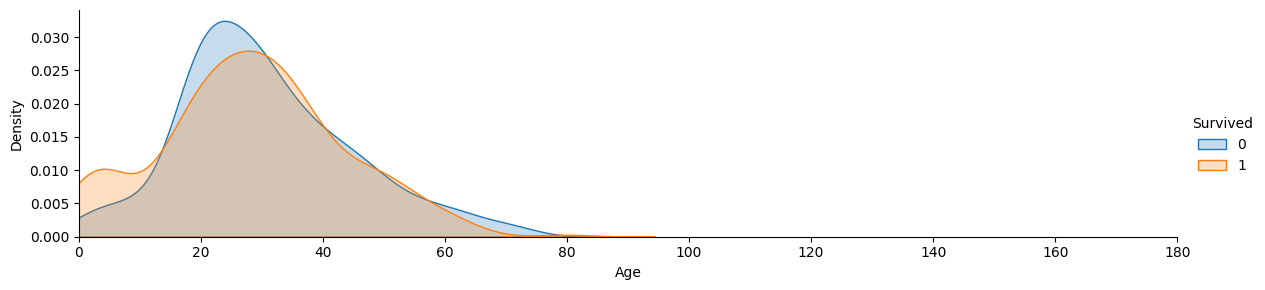

In [ ]:
kedplot("Age")

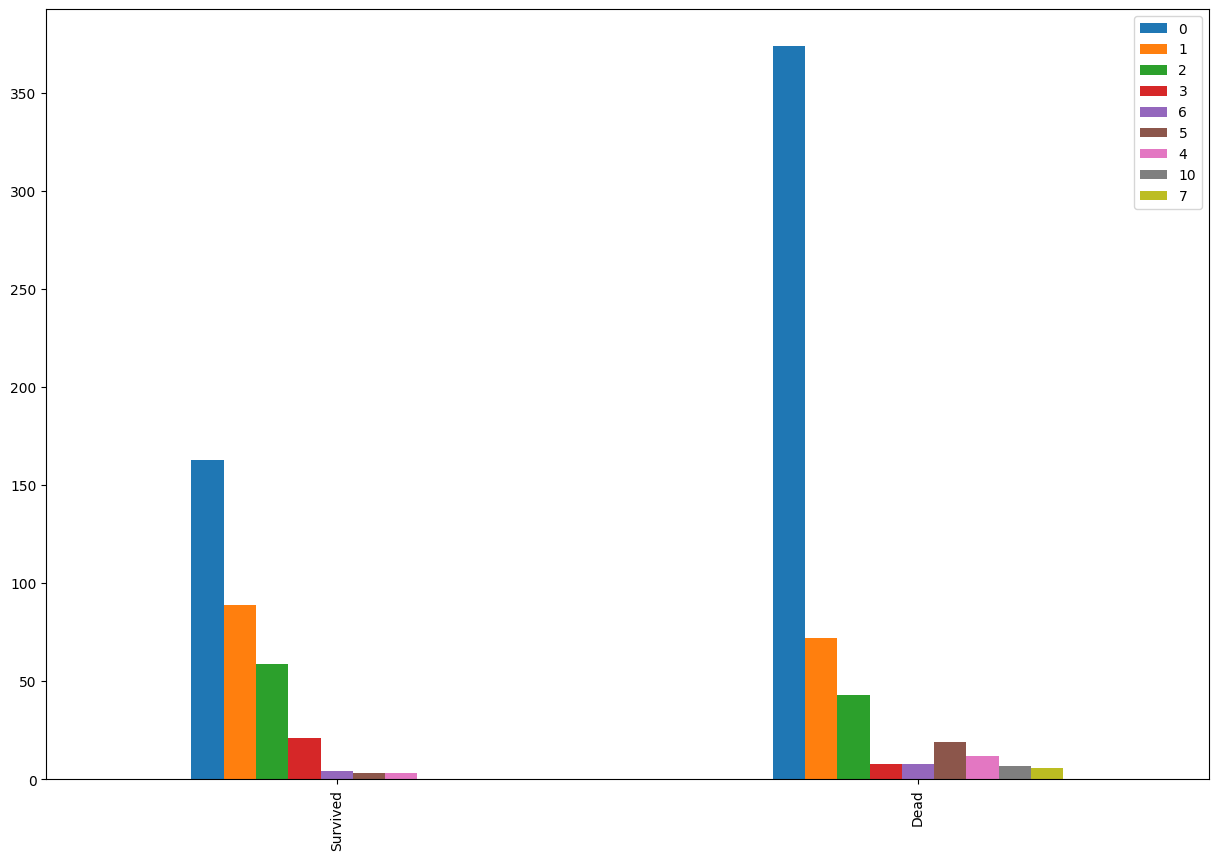

In [ ]:
train_df['Familysize']=train_df['SibSp'] + train_df['Parch']
bar_chart('Familysize')

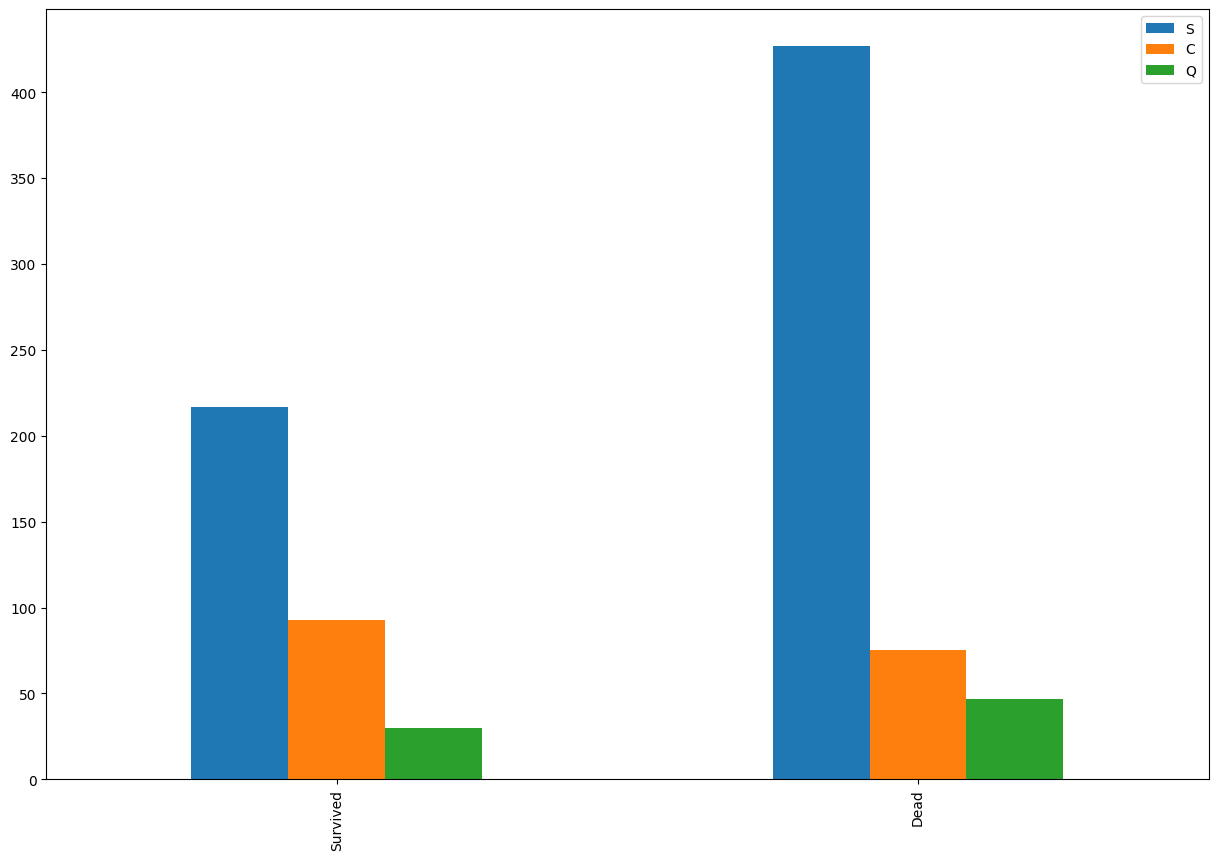

In [ ]:
bar_chart("Embarked")

In [ ]:
#평균으로 결측치 처리
train_df['Age'].fillna(train_df['Age'].mean(axis=0),inplace=True)#여기서 오류 가능성 axis=0은 열의 데이터를 반영한다는 의미, inplace=True는 바꾼 데이터 내용을 새로운 데이터프레임에 넣는 것이 아니라 바로 적용
#train_df['Embarked'].fillna(train_df['Embarked'].mean(axis=0),inplace=True)

In [ ]:
# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
#ranges=[0,16,26,36,62,100]
#labels=[0,1,2,3,4]
#train_df["AgeGroup"]=pd.cut(train_df['Age'],ranges,right=False,labels=labels) #right는 오른쪽 값들을 표현할 지 말지 True면 포함
#train_df.head()
for dataset in train_df:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
for dataset in train_df:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)
train_df.head()

TypeError: ignored

In [ ]:
#fare 요금화
ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
train_df["FareGroup"]=pd.cut(train_df["Fare"],ranges,right=False,labels=labels)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0


In [ ]:
#성별 숫자화
train_df["Sexnum"]=train_df["Sex"].apply(lambda x:1 if(x=='female') else 0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup,FareGroup,Sexnum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,0


In [ ]:
#선착장 숫자화
train_df["EmbarkedNum"]=train_df["Embarked"].apply(lambda x:0 if(x=="S") else (1 if(x=="C") else 2))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup,FareGroup,Sexnum,EmbarkedNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,0,0


In [ ]:
#target과 사용할 데이터 설정
target=train_df['Survived']
data=train_df[['Pclass','Familysize','AgeGroup','FareGroup','Sexnum','EmbarkedNum']]# 여기에 괄호 두개 사용하는 이유?


In [ ]:
from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트 분리
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)#random state가 같은 값으로 함으로써 알고리즘을 반복하더라도 같은 값 구현 가능
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#k-fold cross validation
K_Fold=KFold(n_splits=10,shuffle=True,random_state=42)

#knn
knn=KNeighborsClassifier(n_neighbors=5)
score_knn=cross_val_score(knn,train_input,train_target,cv=K_Fold,n_jobs=1,scoring='accuracy')

#의사결정 트리
dt=DecisionTreeClassifier()
score_dt=cross_val_score(dt,train_input,train_target,cv=K_Fold,n_jobs=1,scoring='accuracy')

#랜덤 포레스트
rf=RandomForestClassifier()
score_rf=cross_val_score(rf,train_input,train_target,cv=K_Fold,n_jobs=1,scoring='accuracy')

#SVM
sv = svm.SVC(gamma='auto')#gamma가 크면 decision boundary 근처의 값에 의해 크게 영향을 받기 때문에 decision boundary가 휘어질 수 있음
score_sv = cross_val_score(sv,train_input,train_target,cv=K_Fold,n_jobs=1,scoring='accuracy')

#정확도 확인
print("KNN   :",round(np.mean(score_knn)*100,2))# round는 소수점 2자리까지 의미
print("DecisionTree :",round(np.mean(score_dt)*100,2))
print("RandomForest :",round(np.mean(score_rf)*100,2))
print("SVM   :",round(np.mean(score_sv)*100,2))


KNN   : 76.83
DecisionTree : 78.65
RandomForest : 78.93
SVM   : 82.44


In [ ]:
#SVM으로 모델을 훈련하자
sv.fit(data,target)


SVC(gamma='auto')

In [ ]:
#test 데이터도 train과 동일하게 데이터가공
test_df['Familysize']=test_df['SibSp'] + test_df['Parch']
#age 결측치 처리
#평균으로 결측치 채우기
test_df['Age'].fillna(test_df['Age'].mean(axis=0),inplace=True)

# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
test_df["AgeGroup"]=pd.cut(test_df['Age'],ranges,right=False,labels=labels)

# fare 구간화
ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
test_df["FareGroup"]=pd.cut(test_df['Fare'],ranges,right=False,labels=labels)

#성별을 숫자로 매핑
test_df['Sexnum']=test_df['Sex'].apply(lambda x:1 if (x=='female') else 0)

#embarked을 숫자로 매핑
test_df['EmbarkedNum']=test_df['Embarked'].apply(lambda x:0 if (x=='S') else (1 if(x=='C') else 2))

test_data = test_df[['Pclass','Familysize','AgeGroup','FareGroup','Sexnum','EmbarkedNum']]
test_data.head()

pred = sv.predict(test_data)

In [ ]:
#test data 결과 확인
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived' : pred
})
submission.to_csv('/content/drive/MyDrive/titanic/submission.csv')

In [ ]:
#submission file 읽기
submissionfile=pd.read_csv('/content/drive/MyDrive/titanic/submission.csv')
submissionfile.head()

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,0
2,2,894,0
3,3,895,0
4,4,896,1
